# Index
 - Download dataset
 - Sneak-Peak on dataset
 - Creating model
 - Compile model
 - Preprocessing data using keras 
 - Train or Fit model
 - Evaluating Model
 - Visualizing the training process
 - Save and load model
 - Test a single image

## Download dataset

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2021-09-08 11:52:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 172.217.194.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: 'cats_and_dogs_filtered.zip'

     0K .......... .......... .......... .......... ..........  0%  445K 2m30s
    50K .......... .......... .......... .......... ..........  0%  566K 2m14s
   100K .......... .......... .......... .......... ..........  0%  856K 1m56s
   150K .......... .......... .......... .......... ..........  0% 1.08M 1m42s
   200K .......... .......... .......... .......... ..........  0%  964K 95s
   250K .......... .......... .......... .......... ..........  0% 2.13M 84s
   300K .......... .......... .......... .......... ..........  0% 2.03M 77s
   350K .........

 21450K .......... .......... .......... .......... .......... 32% 2.06M 51s
 21500K .......... .......... .......... .......... .......... 32% 1.89M 51s
 21550K .......... .......... .......... .......... .......... 32% 1.42M 51s
 21600K .......... .......... .......... .......... .......... 32%  372K 51s
 21650K .......... .......... .......... .......... .......... 32%  242M 51s
 21700K .......... .......... .......... .......... .......... 32%  260M 50s
 21750K .......... .......... .......... .......... .......... 32%  148M 50s
 21800K .......... .......... .......... .......... .......... 32%  257M 50s
 21850K .......... .......... .......... .......... .......... 32% 1.91M 50s
 21900K .......... .......... .......... .......... .......... 32% 1.91M 50s
 21950K .......... .......... .......... .......... .......... 32% 1.45M 50s
 22000K .......... .......... .......... .......... .......... 32% 1.88M 50s
 22050K .......... .......... .......... .......... .......... 32% 1.84M 49s

 57550K .......... .......... .......... .......... .......... 85% 4.14M 7s
 57600K .......... .......... .......... .......... .......... 86% 2.30M 7s
 57650K .......... .......... .......... .......... .......... 86% 3.77M 7s
 57700K .......... .......... .......... .......... .......... 86% 2.73M 7s
 57750K .......... .......... .......... .......... .......... 86% 2.84M 6s
 57800K .......... .......... .......... .......... .......... 86% 2.63M 6s
 57850K .......... .......... .......... .......... .......... 86% 2.94M 6s
 57900K .......... .......... .......... .......... .......... 86% 3.22M 6s
 57950K .......... .......... .......... .......... .......... 86% 1.76M 6s
 58000K .......... .......... .......... .......... .......... 86% 3.76M 6s
 58050K .......... .......... .......... .......... .......... 86% 2.13M 6s
 58100K .......... .......... .......... .......... .......... 86% 4.09M 6s
 58150K .......... .......... .......... .......... .......... 86%  535K 6s
 58200K ....

In [10]:
!tar -x [cats_and_dogs_filtered.zip]

tar: Error opening archive: Failed to open '\\.\tape0'


In [1]:
!tree -L 2 cats_and_dogs_filtered

Too many parameters - 2


In [4]:
import os
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat picture
train_cats = os.path.join(train_dir, 'cats')
train_dogs = os.path.join(train_dir, 'dogs')

# Directory with our validation cat picture
validation_cats = os.path.join(validation_dir, 'cats')
validation_dogs = os.path.join(validation_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir(train_cats)
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir(train_dogs)
train_dog_fnames.sort()
print(train_dog_fnames[:5])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']


In [7]:
print('Total training cat images:', len(os.listdir(train_cats)))
print('Total training  dog images', len(os.listdir(train_dogs)))
print('Total validation cat images', len(os.listdir(validation_cats)))
print('Total validation dog images', len(os.listdir(validation_dogs)))

Total training cat images: 1000
Total training  dog images 1000
Total validation cat images 500
Total validation dog images 500


In [15]:
import matplotlib.pyplot as plt
from matplotlib import image
import random

# Parameters
nrows = 4
ncols = 4

number_image_to_take = 4
cat_images = [os.path.join(train_cats, file_name)
                 for file_name in random.sample(os.listdir(train_cats), number_image_to_take)]
dog_images = [os.path.join(train_dogs,file_name)
                 for file_name in random.sample(os.listdir(train_dogs), number_image_to_take)]

print('Cats:', cat_images)
print('Dogs:', dog_images)
images = cat_images + dog_images

Cats: ['cats_and_dogs_filtered\\train\\cats\\cat.517.jpg', 'cats_and_dogs_filtered\\train\\cats\\cat.121.jpg', 'cats_and_dogs_filtered\\train\\cats\\cat.776.jpg', 'cats_and_dogs_filtered\\train\\cats\\cat.708.jpg']
Dogs: ['cats_and_dogs_filtered\\train\\dogs\\dog.303.jpg', 'cats_and_dogs_filtered\\train\\dogs\\dog.863.jpg', 'cats_and_dogs_filtered\\train\\dogs\\dog.478.jpg', 'cats_and_dogs_filtered\\train\\dogs\\dog.914.jpg']


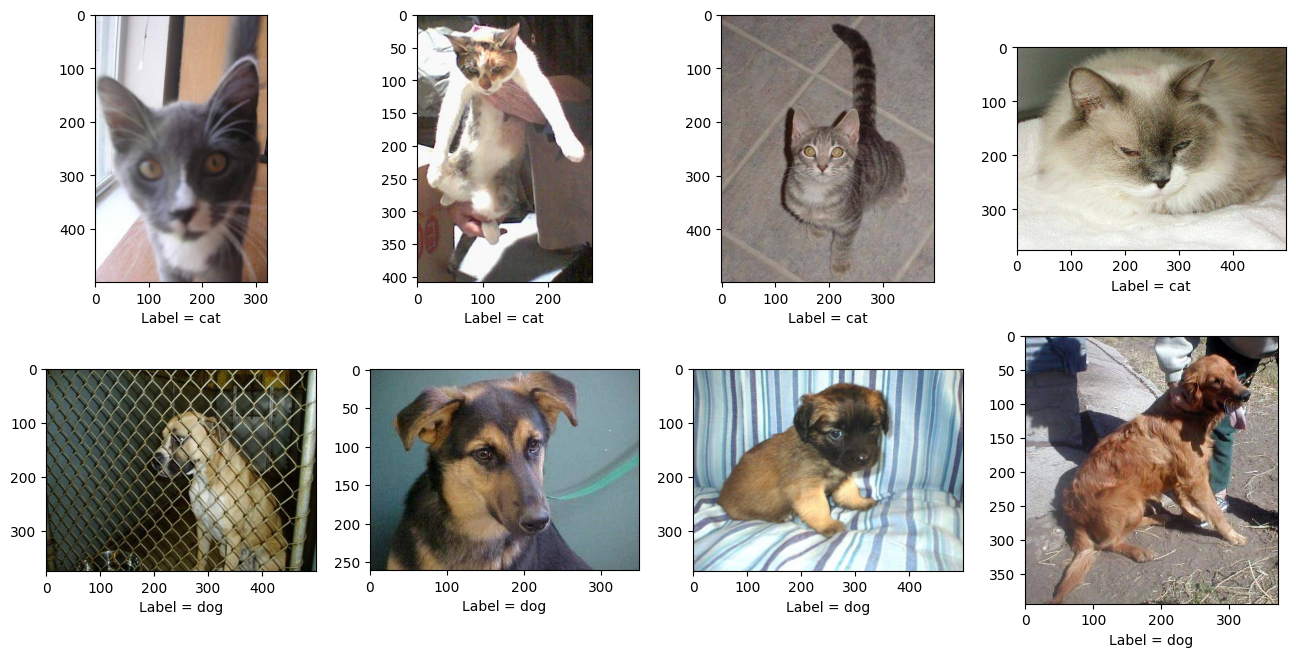

In [16]:
# Set up matplotlib fig
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(images):
    plt.subplot(nrows, ncols, i+1)
    img = image.imread(img_path)
    plt.imshow(img)
    if i < number_image_to_take:
        plt.xlabel('Label = cat')
    else:
        plt.xlabel('Label = dog')
        
plt.show()
    

### Creating Model

In [24]:
from warnings import filterwarnings
filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam